In [138]:
%reset -f

In [139]:
import numpy as np
import os
import sklearn.linear_model
import matplotlib.pyplot as plt
import torch
np.set_printoptions(precision=2,suppress=True)

## Préliminaire graphique

### Plot surface

On rappelle les différentes façon d'afficher une surface en niveau de couleur

In [160]:
x=torch.linspace(0,1,20)
y=torch.linspace(0,1,20)

X,Y=torch.meshgrid(x,y,indexing="ij")
F=X*Y

fig,(ax0,ax1,ax2,ax3,ax4)=plt.subplots(5,1,figsize=(4,20),sharex="all")
ax0.imshow(F,extent=[0,1,0,1],origin="lower",interpolation="bilinear") #pourquoi n'a-t-on pas besoin de mettre X et Y
#pcolormesh n'appelle pas automatiquement la méthode numpy(), domage.
ax1.pcolormesh(X.numpy(),Y.numpy(),F.numpy(),shading="gouraud")
ax2.contour(x,y,F) #notez que c'est petit x et petit y qu'on indique
ax3.contourf(x,y,F)
ax4.contourf(x,y,F,50); #que signigie 50 ?


### Créer son propre plotter

In [161]:
def plot_a_fn(fn,x_range=[-1,1],y_range=[-1,1],n_point=100):
    x=torch.linspace(x_range[0],x_range[1],n_point)
    y=torch.linspace(y_range[0],y_range[1],n_point)
    X,Y=torch.meshgrid(x,y,indexing="xy")
    F=fn(X,Y)
    fig,ax=plt.subplots()
    ax.imshow(F.detach(),extent=[x_range[0],x_range[1],y_range[0],y_range[1]],origin="lower",interpolation="bilinear")

plot_a_fn(lambda x,y:x+y)

### Variante pour un autre type de fonction

Souvent les fonctions des utilisateurs accepte comme argument uniquement des vecteurs `x`et `y`. C'est par exemple le cas du réseau de neurone suivant:


#### ♡♡

In [162]:
class ModelHyperSimple(torch.nn.Module):

    def __init__(self):
        super...
        self.layer=torch.nn.Linear(2,1)

    def forward(self,x,y):
        xy=torch.stack([x,y],dim=1)
        return self.layer(xy)[:,0]

Et du coup notre plotter précédent ne foncionne plus:

In [163]:
model=ModelHyperSimple()
try:
    plot_a_fn(model)
except Exception as e:
    print(e)

Nous créons un plotter adapté à ce type de fonction. Il faut jouer avec les `reshape`

In [164]:
def plot_a_fn_2(fn,x_range=[-1,1],y_range=[-1,1],n_point=100):
    x=torch.linspace(x_range[0],x_range[1],n_point)
    y=torch.linspace(y_range[0],y_range[1],n_point)
    X,Y=torch.meshgrid(x,y,indexing="xy")
    F=fn(X.reshape([-1]),Y.reshape([-1]))
    F=F.reshape([n_point,n_point])
    fig,ax=plt.subplots()
    ax.imshow(F.detach(),extent=[x_range[0],x_range[1],y_range[0],y_range[1]],origin="lower",interpolation="bilinear")

In [165]:
plot_a_fn_2(model)

#### ♡

Expliquez pourquoi on obtient le graph d'un plan.

### Tracer des data-points

In [166]:
fig,(ax,ax1)=plt.subplots(2,1)
data_position_x=torch.linspace(0,10,10)
data_position_y=torch.linspace(0,10,10)
data_value=data_position_x**2

mapa=ax.scatter(data_position_x,data_position_x,c=data_value,s=data_value,cmap="jet",marker="o",edgecolor="k");
plt.colorbar(mapa,ax=ax);


#le plot classique offre moins d'option.
ax1.plot(data_position_x,data_position_y,"o");

#### ♡

Que signifie les arguments `c` et `s` dans `ax.scatter`


Dans la commande:


    plt.colorbar(mapa,ax=ax);

il faut préciser
* l'association des couleurs (les fonctions ax.plot renvoie des objets `mapable` pour cela)
*  sur quel axe on accroche la colorbar.

### Notre plotter pour la suite

La fonction ci-dessous permet de tracer le graph d'une fonction mathématique de $\mathbb R^2$ dans $\mathbb R$, en niveau de couleur, et de lui supperposer des data-points.






In [167]:
def plot_res_2D(function,data_x,data_y,data_value,x_range=[-3,3],y_range=[-3,3]):
    n_point=100
    x=torch.linspace(x_range[0],x_range[1],n_point)
    y=torch.linspace(y_range[0],y_range[1],n_point)

    X,Y=torch.meshgrid(x,y,indexing="xy")

    F = function(X.reshape([-1]),Y.reshape([-1]))
    F=F.reshape([n_point,n_point])

    #une échelle de couleur qui englobe toutes les données
    vmin,vmax=torch.amin(F),torch.amax(F)
    vmin,vmax=torch.minimum(vmin,torch.amin(data_value)),torch.maximum(vmax,torch.amax(data_value))


    fig,ax=plt.subplots()
    mapa=ax.imshow(F.detach(),extent=[x_range[0],x_range[1],y_range[0],y_range[1]],origin="lower",interpolation="bilinear",cmap="jet")


    fig.colorbar(mapa)
    ax.scatter(data_x,data_y,c=data_value,cmap="jet",marker="o",edgecolor="k",vmin=vmin,vmax=vmax)


#test avec la fonction (x,y)-> exp(x/3)
def exemple_function(x,y):
    return torch.exp(x/3)


data_x=torch.tensor([1,2,2.5])
data_y=torch.tensor([1,2,2.5])
data_value=torch.tensor([3,-1,0])

plot_res_2D(exemple_function,data_x,data_y,data_value )



#### ♡♡

En lisant le code:

* Pour quel type de  `function` est construit ce plotter.

* Pour quel type de data est construit ce ploter


* Comment a-t-on fait pour que l'échelle des couleurs de la fonction et celle des data soient cohérente.


Le but d'un ajustement de fonction c'est de se donné d'abords les points, puis de trouver la fonction qui passe par ces points. Voici par exemple un ajustement parfait:

In [148]:
def rand_point():
    return (torch.rand(100)-0.5)*6


data_x,data_y=rand_point(),rand_point()

a_func=lambda x,y:x**2+y**2

data_value=a_func(data_x,data_y)

plot_res_2D(a_func,data_x,data_y,data_value)

#### ♡

***A vous:*** Ajoutez un peu de bruit sur les points, pour que leur coueur différent légèrement du fond.

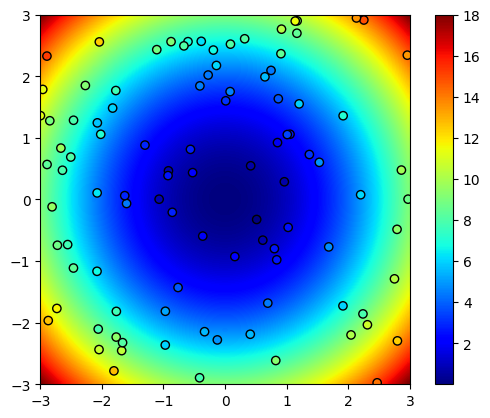

In [149]:
#--- To keep following outputs, do not run this cell! ---

## Regression linéaire

### Créer des data linéaires

In [168]:
def genere_data_quant(nbData):
    """génération des données:
       Y=  X @ a + b + bruit
        """
    X = (torch.rand(nbData, 2)-0.5)*6
    a = torch.tensor([3.,4.]).reshape((2,1))
    b = 1.
    Y = X @ a + b + torch.randn(nbData)
    return X,Y

X_train,Y_train=genere_data_quant(100)
X_val,Y_val=genere_data_quant(50)

X_train.shape,Y_train.shape

In [169]:
fig,ax=plt.subplots()
colors=ax.scatter(X_train[:,0],X_train[:,1],c=Y_train[:,0],cmap="jet");
fig.colorbar(colors);

#### ♡♡♡♡♡♡

Créez un modèle linéaire en torch, et entrainez-le. Puis à l'aide de notre plotter, créez le plot suivant.

Attention, pour que notre plotter fonctionne avec votre modèle, il faudra que ce modèle prennent comme entrée 2 vecteurs `x`,`y` (et pas une matrice avec 2 colonnes comme on pourrait aussi le faire).  On a déjà fait un exemple comme ceci dans ce TP.

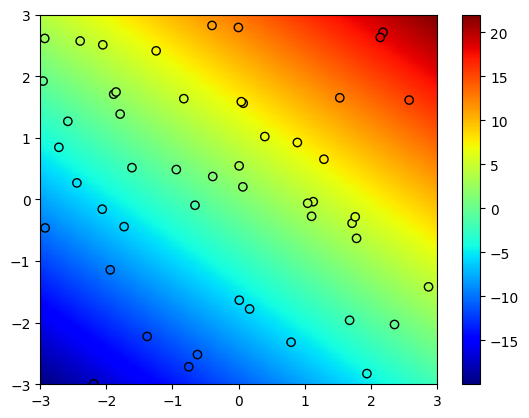

### Non linéaire

#### ♡♡

Que faudrait-il changer pour s'adapter aux donnée ci-dessous. Expliquez. Faites-le uniquement en bonus si vous avez fini le TP. Car il faut passer à la classification maintenant.

In [152]:
def genere_data_quant_non_lin(nbData):

    X = (torch.rand(nbData, 2)-0.5)*6
    a = torch.tensor([3.,4.]).reshape((2,1))
    b = 1.
    Y = torch.sin( X @ a + b + torch.randn(nbData))
    return X,Y

X_train,Y_train=genere_data_quant_non_lin(2000)
X_val,Y_val=genere_data_quant_non_lin(100)

X_train.shape,Y_train.shape

In [153]:
fig,ax=plt.subplots()
colors=ax.scatter(X_train[:,0],X_train[:,1],c=Y_train[:,0],cmap="jet");
fig.colorbar(colors);

##  Classification binaire

On repart de zéro pour éviter les mauvaises interactions.

Recompilez seulement la fonction `plot_res_2D`.

In [154]:
%reset -f

In [155]:
import torch
import numpy as np
import os
import matplotlib.pyplot as plt

np.set_printoptions(precision=2,suppress=True)

### Data

In [156]:
"the moons dataset using Scikit-Learn's"
from sklearn.datasets import make_moons

In [157]:
X_train,Y_train=make_moons(500, noise=0.1)
X_val,Y_val=make_moons(100, noise=0.1)

X_train.shape,Y_train.shape,Y_train[:10]

In [158]:
fig,ax=plt.subplots()
ax.scatter(X_train[:,0],X_train[:,1],c=Y_train,cmap="jet",marker="+",alpha=0.3,label="train");
ax.scatter(X_val[:,0],X_val[:,1],c=Y_val,cmap="jet",marker=".",label="val")

ax.legend();

Notre travail: déterminer 2 zones du plan où l'on a le plus de chance d'observer un point bleu/rouge.

Ces zones doivent être construites à partir du jeu de données `train`, et on calculera notre accuracy à partir du jeu de données `val`

### Modèle logistique

#### ♡♡



Dans le cas binaire, on peut se contenter d'un modèle qui prend en entrée les points du plan  et renvoie un scalaire dans $[0,1]$ qui est la probabilité d'observer la classe rouge (=class 1) en ce point.


supposons que les points sont rangés dans une matrice `X` de shape `nb_point,2`.

La manière la plus simple de construire un tel model est:
$$
\hat p = \sigma(X \cdot w +b)
$$
ou $\sigma$ est la fonction sigmoide
$$
\sigma(x) = \color{red}{\square \square \square}
$$
C'est le modèle logistique. On peut aussi mettre la sigmoide dans la loss, dans ce cas le modèle renvoie simplement un logits:
$$
\hat \ell = \color{red}{\square \square \square}
$$

### La loss

#### ♡♡





La loss qu'il fallait utilisé dans l'agent c'est:

$$
loss(p,\hat p) = - \frac 1 m \sum\limits_{i=0}^{m-1}\left[ p_i \log\left(\hat{p}_i\right) +\color{red}{\square \square \square} \right]
$$

Que l'on peut implanter à la main ou alors qu'on peut récupérer dans `torch`. Attention, ci-dessus on a mis la version `from proba`. La version `from logits` étant:


$$
loss(p,\hat \ell) = - \frac 1 m \sum\limits_{i=0}^{m-1}\left[ p_i \log\left( \sigma(\hat{\ell})_i\right) + \color{red}{\square \square \square} \right]
$$
où $\sigma$ est la fonction sigmoide

### Entrainement

#### ♡♡♡♡♡♡

Avec torch, créez et ajustez un modèle logistique. Puis avec le plotter créez le plot suivant.

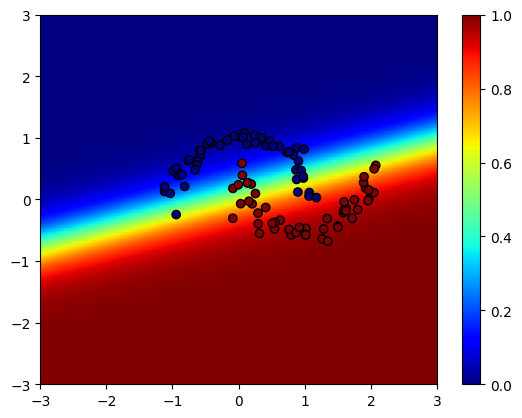

#### ♡

Pourquoi est-ce que ça marche si mal ?

### Remetez-en une couche

#### ♡♡♡♡♡♡


***A vous:***  Créez un réseau de neurones à deux couches avec tensorflow. Il s'agit de modifier le programme précédent pour que l'estimation de probabilité soit
$$
\hat p = \sigma\Big(   \mathtt{relu} ( X \cdot W +b )\cdot W' + b' \Big)
$$
où $W$ et $W'$ sont des matrices de paramètres et $b'$ un vecteur de paramètre.


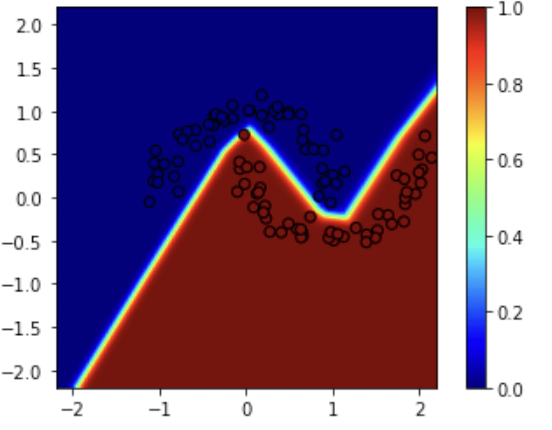

 On voit que ce n'est pas tout à fait optimal car la frontière est "anguleuse". Faites le lien en cette angulosité et la fonction d'activation choisie.

### Faites mieux (bonus)




#### ♡♡♡

Construisez un meilleurs modèles, avec un frontière de décision plus proche de ce qu'un humain aimerait faire.

## Classification multi-classes


### Data

In [159]:
def spiral(N=2000, D=2, K=3):
    """
    N: number of points per class
    D: dimensionality
    K: number of classes
    """
    X = torch.zeros((N*K, D))
    y = torch.zeros(N*K,dtype=torch.int32)
    for j in range(K):
        ix = range(N*j, N*(j+1))
        # radius
        r = torch.linspace(0.0,1,N)
        # theta
        t = torch.linspace(j*4,(j+1)*4,N) + torch.randn(N)*0.2
        X[ix] = torch.stack([r*torch.sin(t), r*torch.cos(t)],dim=1)
        y[ix] = j

    return X,y

X,Y=spiral()
fig,ax=plt.subplots()
ax.scatter(
      X[:,0],
      X[:,1],
      c=Y,
      marker=".", #petits points
      alpha=0.3,
      linewidths=0, #pas d'entourage
      cmap="jet"
  );

### Modèle et entrainement

#### ♡♡♡♡♡♡

Créez un modèle mutli-classe et entrainez-le.


 ### Présentations du résutat

 Avec `plot_res_2D` on pourra afficher les points et ajouter l'affichage des fonctions suivantes:

1. Choix 1:

        (x,y) -> model(x,y)[0] c'est à dire la proba estimée de la classe 0 (ou autre) quand l'input est (x,y)

2. Choix 2:

        (x,y) -> classe estimée associée à l'input (x,y)



#### ♡♡♡♡

Le choix 1 devrait vous donner ce graphique

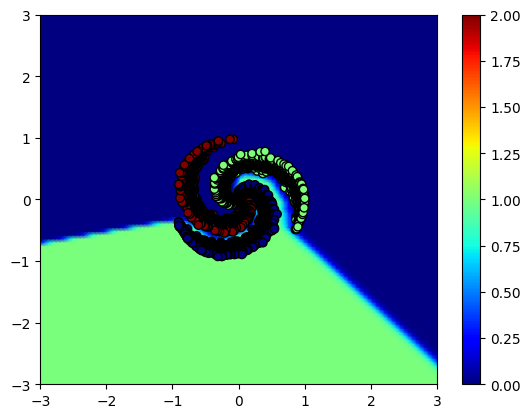

#### ♡♡♡♡

Le choix 2 devrait vous donner ce graphique

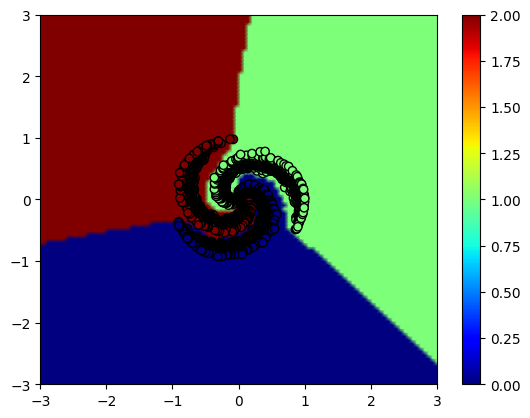